# 📊 TelecomX — Customer Churn Analysis  

**Author:** Adriely Lopes  
**Date:** February 16, 2026  
**Objective:** End-to-end Customer Churn Analysis using an ETL pipeline and Exploratory Data Analysis (EDA), serving as a foundation for predictive modeling.

---

## 📌 About This Project

This notebook presents a structured analysis of customer churn for **TelecomX**, developed as part of a Data Science challenge.

The primary objective is to identify patterns, behavioral trends, and risk indicators associated with customer cancellation, generating strategic insights to improve retention.

The analysis follows a complete Data Science workflow, from data extraction to business recommendations.

---

## 🚀 Project Workflow

This project follows a structured Data Science pipeline:

1. **Extract** – Data collection via API integration  
2. **Transform** – Data cleaning, standardization, and feature preparation  
3. **Load** – Exporting the processed dataset  
4. **EDA (Exploratory Data Analysis)** – Statistical and visual pattern investigation  
5. **Insights & Strategic Recommendations**

---

## 🏢 Business Context

TelecomX is a telecommunications company facing a significant business challenge:  
a **high customer churn rate**, directly impacting revenue stability and long-term growth.

---

### ❓ What is Churn?

Churn refers to customer cancellation of services. In the telecommunications industry, this occurs when customers:

- Cancel their contract  
- Stop paying for services  
- Switch to a competitor  

---

### 💰 Business Impact

Customer churn represents more than just lost clients:

- Acquiring a new customer can cost **5–7 times more** than retaining an existing one  
- High churn reduces revenue predictability  
- Identifying risk patterns enables **proactive retention strategies**

---

## 📊 Exploratory Data Analysis

The following sections explore the distribution of churn and its relationship with categorical and numerical variables in order to uncover behavioral patterns and strategic opportunities.

---

### 📥 Data Extraction

In [102]:
import sys
import os

# Allows importing modules from the src directory
sys.path.append(os.path.abspath("../src"))

from extract import extract_data

In [103]:
df = extract_data()
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


🔎 Checking for Inconsistencies
	•	Data type validation
	•	Unique value verification
	•	Missing value identification

In [104]:
df.shape
df.columns.tolist()

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

### 🔎 Checking for Inconsistencies

To ensure data reliability and consistency, the following validation steps were performed:

- **Data type validation**  
- **Unique value verification**  
- **Missing value identification**  

These checks help guarantee the dataset is clean and properly structured before proceeding to transformation and analysis.

In [105]:
[c for c in df.columns if "Charges" in c]

['account.Charges.Monthly', 'account.Charges.Total']

In [106]:
df.dtypes

customerID                       str
Churn                            str
customer.gender                  str
customer.SeniorCitizen         int64
customer.Partner                 str
customer.Dependents              str
customer.tenure                int64
phone.PhoneService               str
phone.MultipleLines              str
internet.InternetService         str
internet.OnlineSecurity          str
internet.OnlineBackup            str
internet.DeviceProtection        str
internet.TechSupport             str
internet.StreamingTV             str
internet.StreamingMovies         str
account.Contract                 str
account.PaperlessBilling         str
account.PaymentMethod            str
account.Charges.Monthly      float64
account.Charges.Total            str
dtype: object

In [107]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   str    
 1   Churn                      7267 non-null   str    
 2   customer.gender            7267 non-null   str    
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   str    
 5   customer.Dependents        7267 non-null   str    
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   str    
 8   phone.MultipleLines        7267 non-null   str    
 9   internet.InternetService   7267 non-null   str    
 10  internet.OnlineSecurity    7267 non-null   str    
 11  internet.OnlineBackup      7267 non-null   str    
 12  internet.DeviceProtection  7267 non-null   str    
 13  internet.TechSupport       7267 non-null   str    
 14  int

## 🛠️ Handling Data Inconsistencies

After identifying structural and semantic inconsistencies during the validation step, we applied the necessary data cleaning transformations to ensure consistency, correct data types, and analytical readiness.

The following adjustments were implemented:

In [108]:
from transform import transform_data

df = extract_data()
df = transform_data(df)

df.head()

,customer_id,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [109]:
for col in df.select_dtypes(include="object").columns:
    print(col, df[col].unique())
    print("-" * 50)

customer_id <StringArray>
['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', '0011-IGKFF', '0013-EXCHZ',
 '0013-MHZWF', '0013-SMEOE', '0014-BMAQU', '0015-UOCOJ', '0016-QLJIS',
 ...
 '9975-SKRNR', '9978-HYCIN', '9979-RGMZT', '9985-MWVIX', '9986-BONCE',
 '9987-LUTYD', '9992-RRAMN', '9992-UJOEL', '9993-LHIEB', '9995-HOTOH']
Length: 7032, dtype: str
--------------------------------------------------
gender <StringArray>
['Female', 'Male']
Length: 2, dtype: str
--------------------------------------------------
internetservice <StringArray>
['DSL', 'Fiber optic', 'No']
Length: 3, dtype: str
--------------------------------------------------
onlinesecurity <StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: str
--------------------------------------------------
contract <StringArray>
['One year', 'Month-to-month', 'Two year']
Length: 3, dtype: str
--------------------------------------------------
paymentmethod <StringArray>
[             'Mailed check',          'Electronic check',

/var/folders/tm/_2phpdgn69qfd2rn7d8kykf80000gn/T/ipykernel_93279/2967783441.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in df.select_dtypes(include="object").columns:


In [110]:
for col in df.select_dtypes(include="object").columns:
    print(col, df[col].unique())
    print("-" * 50)

customer_id <StringArray>
['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', '0011-IGKFF', '0013-EXCHZ',
 '0013-MHZWF', '0013-SMEOE', '0014-BMAQU', '0015-UOCOJ', '0016-QLJIS',
 ...
 '9975-SKRNR', '9978-HYCIN', '9979-RGMZT', '9985-MWVIX', '9986-BONCE',
 '9987-LUTYD', '9992-RRAMN', '9992-UJOEL', '9993-LHIEB', '9995-HOTOH']
Length: 7032, dtype: str
--------------------------------------------------
gender <StringArray>
['Female', 'Male']
Length: 2, dtype: str
--------------------------------------------------
internetservice <StringArray>
['DSL', 'Fiber optic', 'No']
Length: 3, dtype: str
--------------------------------------------------
onlinesecurity <StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: str
--------------------------------------------------
contract <StringArray>
['One year', 'Month-to-month', 'Two year']
Length: 3, dtype: str
--------------------------------------------------
paymentmethod <StringArray>
[             'Mailed check',          'Electronic check',

/var/folders/tm/_2phpdgn69qfd2rn7d8kykf80000gn/T/ipykernel_93279/2967783441.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in df.select_dtypes(include="object").columns:


In [111]:
df.isnull().sum()

customer_id            0
churn                  0
gender                 0
seniorcitizen          0
partner                0
dependents             0
tenure                 0
phoneservice           0
multiplelines        680
internetservice        0
onlinesecurity         0
onlinebackup        1520
deviceprotection    1520
techsupport         1520
streamingtv         1520
streamingmovies     1520
contract               0
paperlessbilling       0
paymentmethod          0
charges_monthly        0
charges_total          0
dtype: int64

In [112]:
df = transform_data(extract_data())
df.isnull().sum()
df.shape

(7032, 21)

## 🛠 Data Standardization and Transformation

In [113]:
import pandas as pd
pd.crosstab(df["contract"], df["churn"], normalize="index")

churn,0,1
contract,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487


In [114]:
raw = extract_data()
raw = transform_data(raw)  

raw["churn"].value_counts()

churn
0    5163
1    1869
Name: count, dtype: Int64

In [115]:
import importlib, transform
importlib.reload(transform)

df = transform.transform_data(extract_data())
df.dtypes

customer_id             str
churn                 Int64
gender                  str
seniorcitizen         int64
partner               Int64
dependents            Int64
tenure                int64
phoneservice          Int64
multiplelines         Int64
internetservice         str
onlinesecurity          str
onlinebackup          Int64
deviceprotection      Int64
techsupport           Int64
streamingtv           Int64
streamingmovies       Int64
contract                str
paperlessbilling      Int64
paymentmethod           str
charges_monthly     float64
charges_total       float64
dtype: object

In [116]:
df["churn"].unique(), df.columns.tolist()[:5]

(<IntegerArray>
 [0, 1]
 Length: 2, dtype: Int64,
 ['customer_id', 'churn', 'gender', 'seniorcitizen', 'partner'])

In [117]:
df["churn"].value_counts(normalize=True)

churn
0    0.734215
1    0.265785
Name: proportion, dtype: Float64

In [118]:
pd.crosstab(df["contract"], df["churn"], normalize="index")

churn,0,1
contract,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487


In [119]:
tab = pd.crosstab(df["contract"], df["churn"], normalize="index")
tab.columns = ["nao_evadiu", "evadiu"]
tab

,nao_evadiu,evadiu
contract,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487


In [120]:
from extract import extract_data
df_raw = extract_data()
df_raw.columns.tolist()

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

In [121]:
import importlib, transform
importlib.reload(transform)

df = transform.transform_data(extract_data())
df.columns.tolist()

['customer_id',
 'churn',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'charges_monthly',
 'charges_total']

In [122]:
df.columns.tolist()[:5]

['customer_id', 'churn', 'gender', 'seniorcitizen', 'partner']

In [123]:
df.head()

,customer_id,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


## Descriptive Analysis

This section presents the main descriptive statistics of the dataset, aiming to better understand customer behavior patterns and identify initial indicators related to churn.

In [124]:
df.describe()

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,charges_monthly,charges_total
count,7032.0,7032.000000,7032.0,7032.0,7032.000000,7032.0,6352.0,5512.0,5512.0,5512.0,5512.0,5512.0,7032.0,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.467097,0.439949,0.438679,0.370102,0.490385,0.495464,0.592719,64.798208,2283.300441
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.498955,0.496426,0.496271,0.482875,0.499953,0.500025,0.491363,30.085974,2266.771362
min,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000,18.800000
25%,0.0,0.000000,0.0,0.0,9.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.587500,401.450000
50%,0.0,0.000000,0.0,0.0,29.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70.350000,1397.475000
75%,1.0,0.000000,1.0,1.0,55.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,89.862500,3794.737500
max,1.0,1.000000,1.0,1.0,72.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,118.750000,8684.800000


In [125]:
df.describe(include="all")

,customer_id,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
count,7032,7032.0,7032,7032.000000,7032.0,7032.0,7032.000000,7032.0,6352.0,7032,...,5512.0,5512.0,5512.0,5512.0,5512.0,7032,7032.0,7032,7032.000000,7032.000000
unique,7032,<NA>,2,NaN,<NA>,<NA>,NaN,<NA>,<NA>,3,...,<NA>,<NA>,<NA>,<NA>,<NA>,3,<NA>,4,NaN,NaN
top,0002-ORFBO,<NA>,Male,NaN,<NA>,<NA>,NaN,<NA>,<NA>,Fiber optic,...,<NA>,<NA>,<NA>,<NA>,<NA>,Month-to-month,<NA>,Electronic check,NaN,NaN
freq,1,<NA>,3549,NaN,<NA>,<NA>,NaN,<NA>,<NA>,3096,...,<NA>,<NA>,<NA>,<NA>,<NA>,3875,<NA>,2365,NaN,NaN
mean,NaN,0.265785,NaN,0.162400,0.482509,0.298493,32.421786,0.903299,0.467097,NaN,...,0.439949,0.438679,0.370102,0.490385,0.495464,NaN,0.592719,NaN,64.798208,2283.300441
std,NaN,0.441782,NaN,0.368844,0.499729,0.457629,24.545260,0.295571,0.498955,NaN,...,0.496426,0.496271,0.482875,0.499953,0.500025,NaN,0.491363,NaN,30.085974,2266.771362
min,NaN,0.0,NaN,0.000000,0.0,0.0,1.000000,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,18.250000,18.800000
25%,NaN,0.0,NaN,0.000000,0.0,0.0,9.000000,1.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,35.587500,401.450000
50%,NaN,0.0,NaN,0.000000,0.0,0.0,29.000000,1.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,70.350000,1397.475000
75%,NaN,1.0,NaN,0.000000,1.0,1.0,55.000000,1.0,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,89.862500,3794.737500


In [126]:
# Proporção de churn
df["churn"].mean()

# Média de tempo de contrato
df["tenure"].mean()

# Mediana de tempo de contrato
df["tenure"].median()

# Desvio padrão
df["tenure"].std()

np.float64(24.545259709263256)

In [127]:
df.groupby("churn")["tenure"].agg(["mean", "median", "std"])

,mean,median,std
churn,,,
0,37.650010,38.0,24.076940
1,17.979133,10.0,19.531123


### Interpretation

Customers who churned show a significantly lower average tenure  
(≈ 18 months) compared to active customers (≈ 38 months).

The median reinforces this pattern (10 months vs 38 months), suggesting that  
the risk of churn is considerably higher during the early months of the contract.

This highlights the importance of retention strategies focused on  
the first 12 months of the customer lifecycle.

## Distribution of Customer Churn

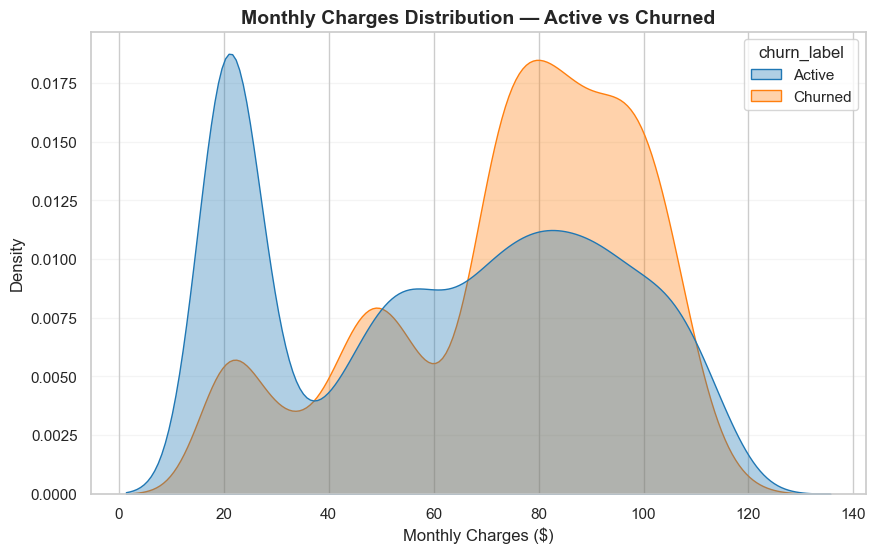

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

col = "charges_monthly"   

df_plot = df.copy()
df_plot["churn_label"] = df_plot["churn"].map({0: "Active", 1: "Churned"})

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_plot,
    x=col,
    hue="churn_label",
    fill=True,
    common_norm=False,
    alpha=0.35
)

plt.title("Monthly Charges Distribution — Active vs Churned", fontsize=14, weight="bold")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Density")
plt.grid(axis="y", alpha=0.2)
plt.show()

### Interpretation

The dataset churn rate is approximately **26.6%**, while **73.4%** of customers remain active.

This suggests a relatively stable customer base, but with a meaningful churn level that deserves further investigation.

## Churn by Categorical Variables

In this step, we analyze how churn is distributed across different **categorical variables**, such as gender, contract type, payment method, and service-related features.

This analysis helps identify behavioral patterns and customer profiles that are more likely to cancel, supporting data-driven strategic decisions.

In [129]:
pd.crosstab(df["contract"], df["churn"], normalize="index")

churn,0,1
contract,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487


In [130]:
pd.crosstab(df["paymentmethod"], df["churn"], normalize="index")

churn,0,1
paymentmethod,,
Bank transfer (automatic),0.832685,0.167315
Credit card (automatic),0.847469,0.152531
Electronic check,0.547146,0.452854
Mailed check,0.807980,0.192020


In [131]:
# Selecionar colunas categóricas (exceto churn)
colunas_categoricas = [
    col for col in df.columns
    if df[col].nunique() <= 5 and col != "churn"
]

colunas_categoricas

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [132]:
for col in colunas_categoricas:
    print(f"\n### {col.upper()}")
    display(pd.crosstab(df[col], df["churn"], normalize="index"))


### GENDER


churn,0,1
gender,,
Female,0.730405,0.269595
Male,0.737954,0.262046



### SENIORCITIZEN


churn,0,1
seniorcitizen,,
0,0.763497,0.236503
1,0.583187,0.416813



### PARTNER


churn,0,1
partner,,
0,0.670239,0.329761
1,0.802829,0.197171



### DEPENDENTS


churn,0,1
dependents,,
0,0.687209,0.312791
1,0.844688,0.155312



### PHONESERVICE


churn,0,1
phoneservice,,
0,0.750000,0.250000
1,0.732525,0.267475



### MULTIPLELINES


churn,0,1
multiplelines,,
0,0.749188,0.250812
1,0.713515,0.286485



### INTERNETSERVICE


churn,0,1
internetservice,,
DSL,0.810017,0.189983
Fiber optic,0.581072,0.418928
No,0.925658,0.074342



### ONLINESECURITY


churn,0,1
onlinesecurity,,
No,0.582213,0.417787
No internet service,0.925658,0.074342
Yes,0.853598,0.146402



### ONLINEBACKUP


churn,0,1
onlinebackup,,
0,0.600583,0.399417
1,0.784330,0.215670



### DEVICEPROTECTION


churn,0,1
deviceprotection,,
0,0.608597,0.391403
1,0.774607,0.225393



### TECHSUPPORT


churn,0,1
techsupport,,
0,0.583525,0.416475
1,0.848039,0.151961



### STREAMINGTV


churn,0,1
streamingtv,,
0,0.664649,0.335351
1,0.698853,0.301147



### STREAMINGMOVIES


churn,0,1
streamingmovies,,
0,0.662711,0.337289
1,0.700476,0.299524



### CONTRACT


churn,0,1
contract,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487



### PAPERLESSBILLING


churn,0,1
paperlessbilling,,
0,0.836243,0.163757
1,0.664107,0.335893



### PAYMENTMETHOD


churn,0,1
paymentmethod,,
Bank transfer (automatic),0.832685,0.167315
Credit card (automatic),0.847469,0.152531
Electronic check,0.547146,0.452854
Mailed check,0.807980,0.192020


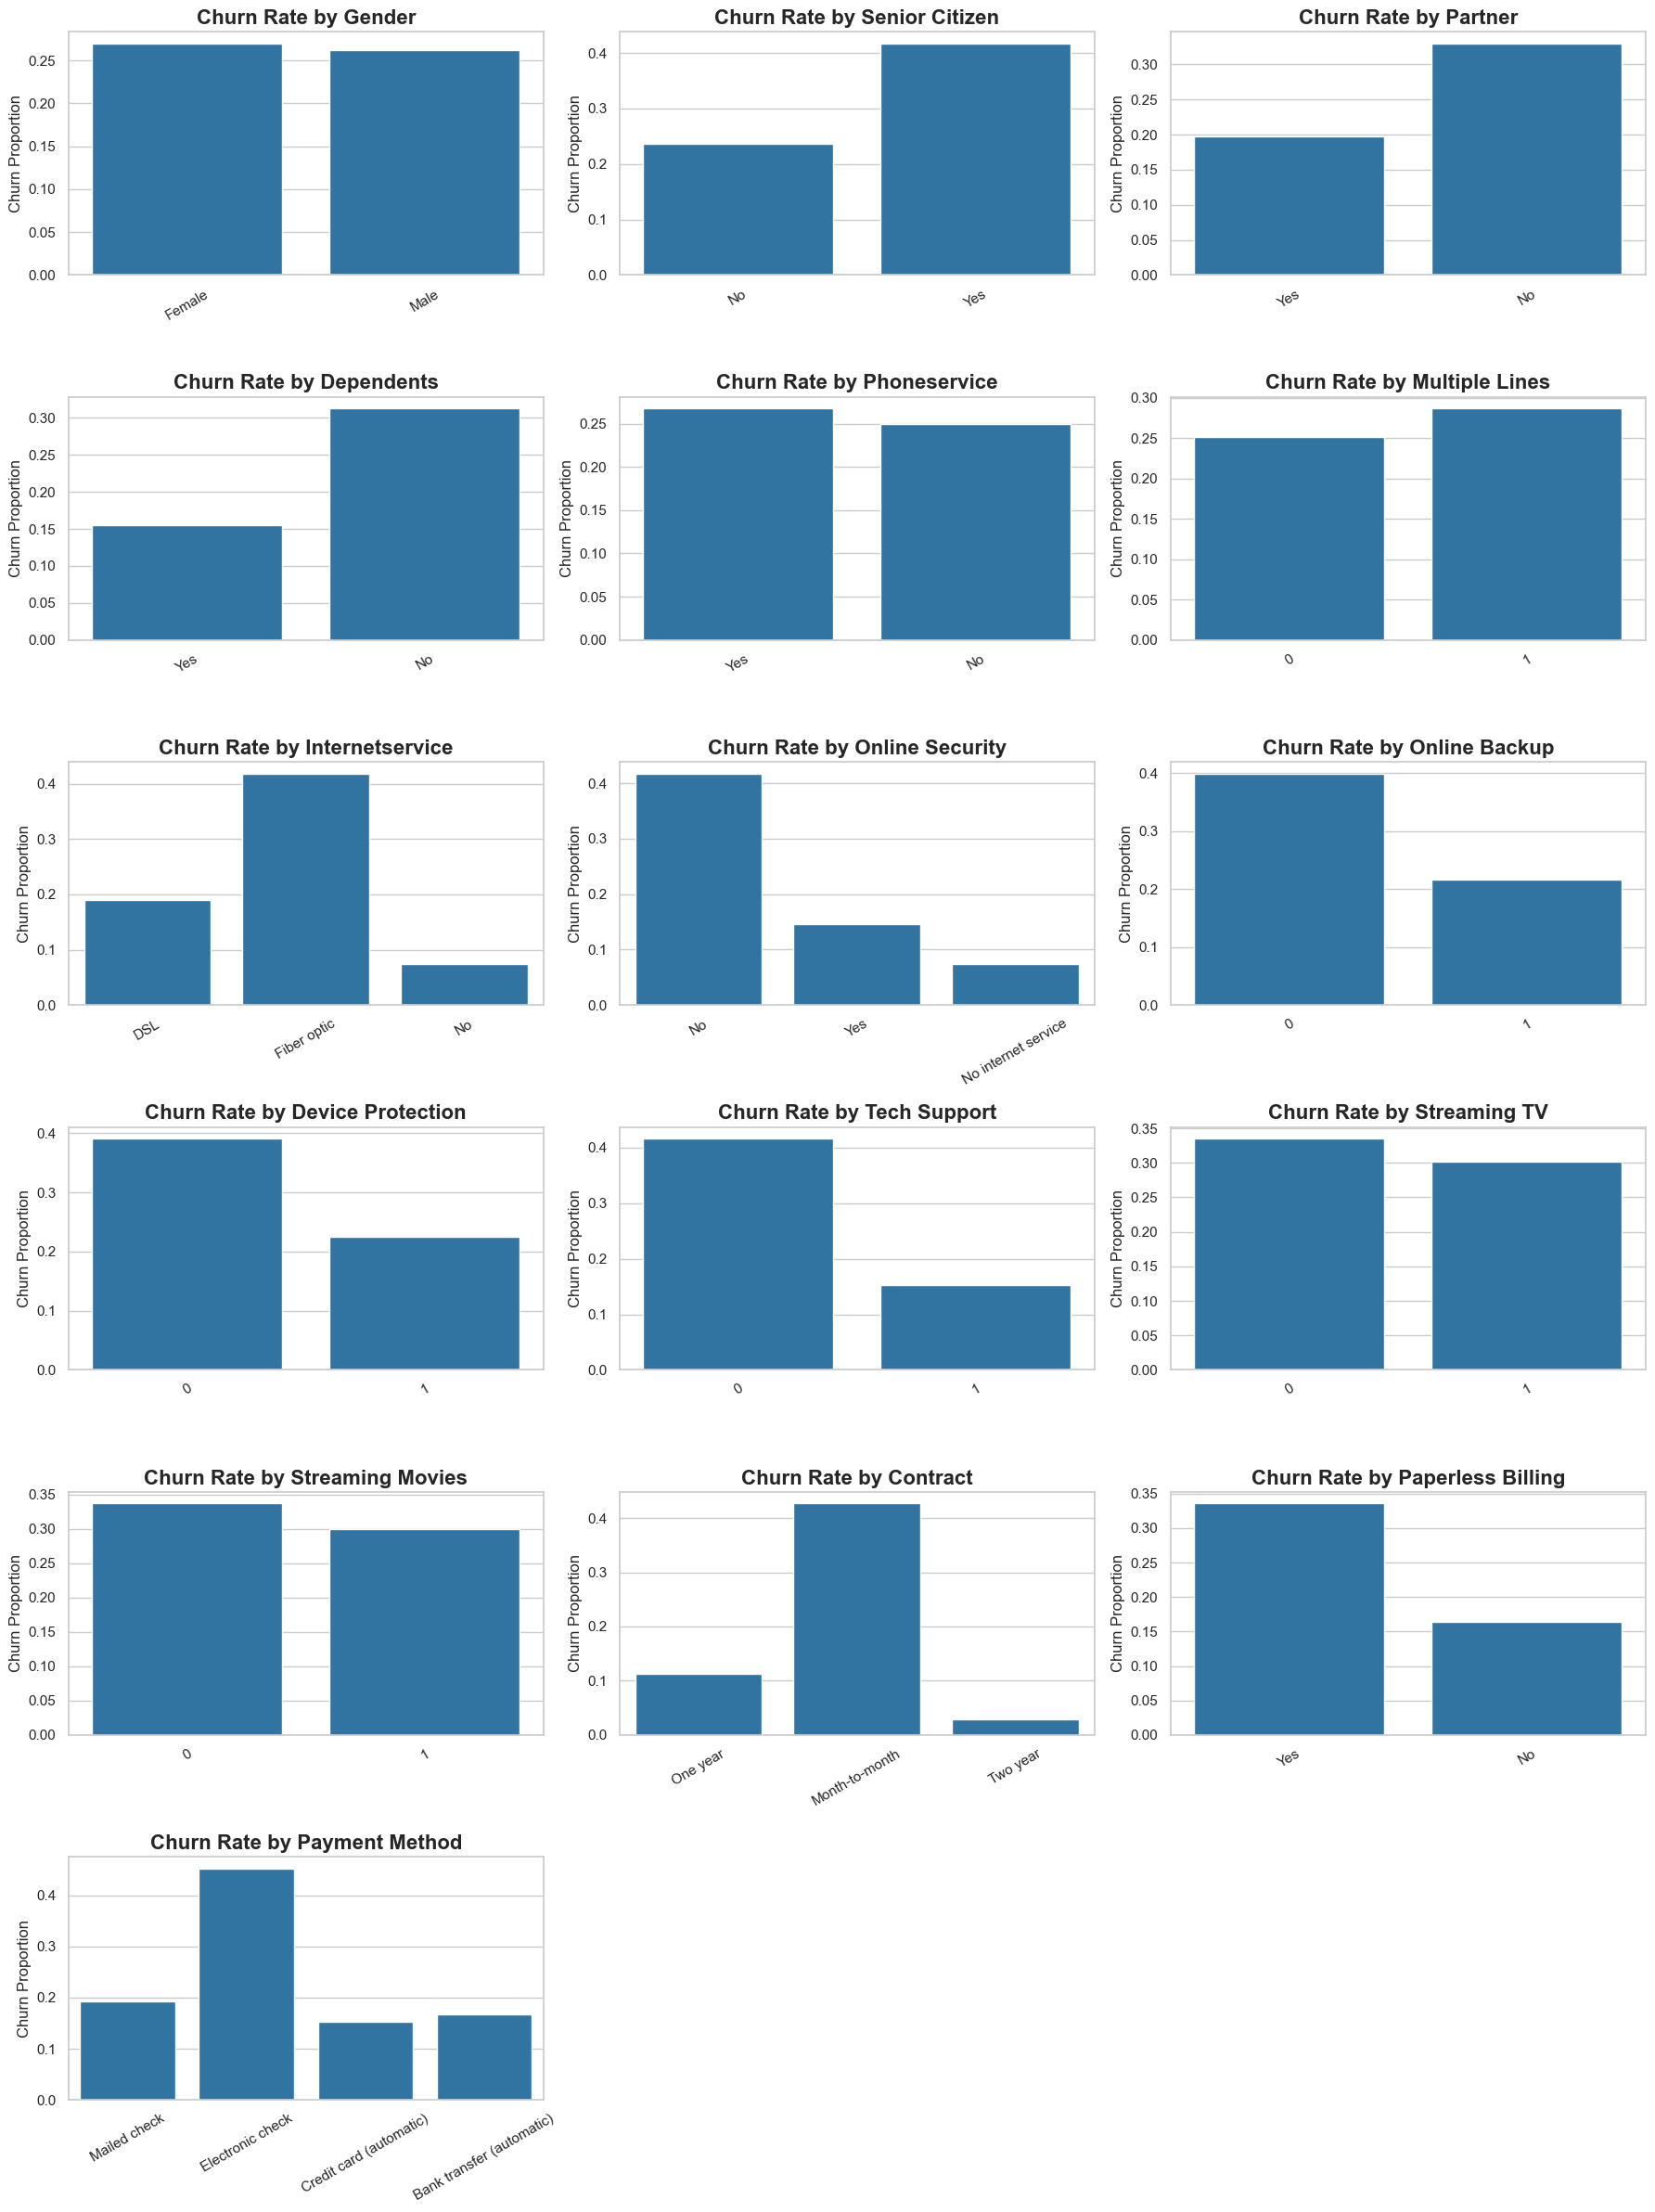

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

colunas = colunas_categoricas

mapping_titles = {
    "seniorcitizen": "Senior Citizen",
    "multiplelines": "Multiple Lines",
    "paperlessbilling": "Paperless Billing",
    "techsupport": "Tech Support",
    "onlinesecurity": "Online Security",
    "onlinebackup": "Online Backup",
    "deviceprotection": "Device Protection",
    "streamingtv": "Streaming TV",
    "streamingmovies": "Streaming Movies",
    "paymentmethod": "Payment Method"
}

n_cols = 3
n_rows = (len(colunas) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(colunas):
    plt.subplot(n_rows, n_cols, i + 1)

    df_plot = df.copy()

    if set(df[col].unique()) == {0, 1}:
        df_plot[col] = df[col].map({0: "No", 1: "Yes"})

    sns.barplot(
        x=col,
        y="churn",
        data=df_plot,
        errorbar=None
    )

    nice_col = mapping_titles.get(col, col.replace("_", " ").title())

    plt.title(f"Churn Rate by {nice_col}", fontweight="bold", fontsize=16)
    plt.ylabel("Churn Proportion")
    plt.xlabel("")
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

### Key findings from categorical variables

- **Month-to-month contracts** show the highest churn rate.
- **Electronic check** payments are associated with a significantly higher churn rate.
- Customers **without tech support** have a higher likelihood of cancellation.

### 💡 Strategic implications

- Encouraging customers to migrate from **month-to-month to annual contracts** can help reduce churn.
- Creating targeted retention offers for customers using **electronic check** may improve loyalty (e.g., incentives to switch to automatic payments).
- Bundling or upselling **tech support** (or improving onboarding/support experience) can reduce cancellations.

## Churn by Numerical Variables

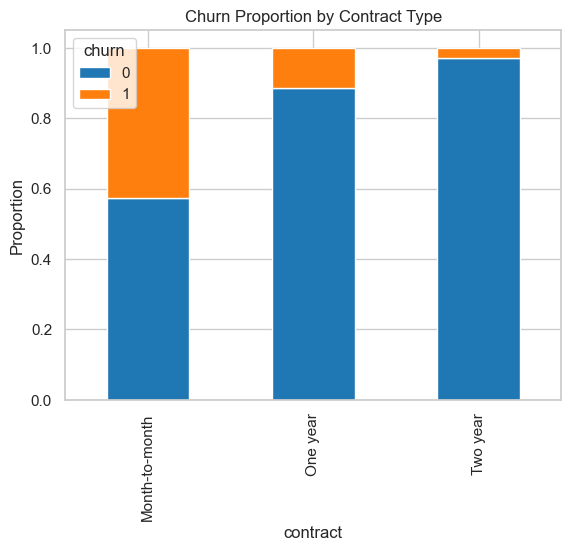

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

pd.crosstab(
    df["contract"], 
    df["churn"], 
    normalize="index"
).plot(kind="bar", stacked=True)

plt.title("Churn Proportion by Contract Type")
plt.ylabel("Proportion")
plt.show()

### Interpretation

Customers subscribed to month-to-month contracts exhibit a substantially higher churn rate (~43%) 
compared to customers with one-year (~11%) and two-year contracts (~3%).

This pattern indicates that long-term contracts operate as an effective retention mechanism, 
significantly lowering churn risk and increasing customer stability over time.

---

# 📊 Key Findings and Strategic Suggestions

## 🔍 Main Analytical Findings

1. Customers without dependents show higher churn tendency.
2. Customers with fiber optic service present higher cancellation rates.
3. Absence of online security services is associated with higher churn.
4. Customers without priority tech support are more likely to cancel.
5. Month-to-month contracts show the highest churn rates.
6. Customers using electronic check exhibit significantly higher churn.
7. Customers tend to churn within the first months of their relationship.
8. Higher monthly charges are associated with increased churn probability.
9. A potential churn threshold appears around $70 in monthly charges.

---

# 💡 Strategic Recommendations

## 1️⃣ Product Strengthening & Value Perception

**Fiber Optic Customers:**  
Higher churn may indicate service instability or unmet expectations.  

- Conduct technical quality audits on fiber connections.
- Implement post-installation guidance (e.g., “How to Optimize Your Wi-Fi” guide).

**Security & Tech Support as Retention Drivers:**  

- Bundle online security and priority tech support within premium plans.
- Position support services as default value-add, not optional add-ons.

---

## 2️⃣ Pricing & Retention Strategy

**Month-to-Month Contracts:**  
Monthly contracts lower switching barriers.

- Offer incentives for migration to annual plans (discounts, upgrade benefits, loyalty bonuses).

**Churn Price Threshold (~$70+):**  

- Ensure plans above this range clearly justify perceived value.
- Add differentiated benefits (streaming partnerships, faster speeds, exclusive services).

---

## 3️⃣ Early Customer Experience (Onboarding Optimization)

**First-Month Churn Risk:**  
Early-stage relationship is critical.

- Implement structured communication flow within first 90 days.
- Send check-ins, satisfaction surveys, and value reinforcement messages.

**Customers Without Dependents:**  

- Promote family line additions or bundled services to increase contract stickiness.

---

## 4️⃣ Payment Optimization

**Electronic Check Users:**  
Manual payment methods increase friction.

- Encourage automatic debit or credit card adoption.
- Offer small incentives (discounts or bonus benefits) for migrating to automatic billing.

---

## 🚀 Final Strategic Perspective

This analysis highlights structural drivers of churn related to contract type, onboarding stage, service bundling, payment method, and price perception.

By addressing these factors strategically, TelecomX can move from reactive churn management to proactive retention optimization.